In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_iipr = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/iipr.csv')
df_iipr['Date'] = pd.to_datetime(df_iipr['Date'])
df_iipr = df_iipr.set_index('Date')
df_iipr = df_iipr.rename(columns={'Open':'iipr_Open', 'High':'iipr_High', 'Low':'iipr_Low', 'Close':'iipr_Close', 'Volume':'iipr_Volume'})
df_iipr = df_iipr.drop('Adj Close', axis=1)
df_iipr['iipr_prev_close'] = df_iipr['iipr_Close'].shift(1)
df_iipr['iipr_next_close'] = df_iipr['iipr_Close'].shift(-1)
df_iipr['iipr_diff'] = df_iipr['iipr_Close'].diff()
df_iipr['iipr_%change'] = df_iipr['iipr_Close'].pct_change()
df_iipr['iipr_5day_avg_close'] = df_iipr['iipr_Close'].rolling(5).mean()
df_iipr['iipr_5day_avg_diff'] = df_iipr['iipr_diff'].rolling(5).mean()
df_iipr['iipr_10day_avg_close'] = df_iipr['iipr_Close'].rolling(10).mean()
df_iipr['iipr_10day_avg_diff'] = df_iipr['iipr_diff'].rolling(10).mean()

In [4]:
df_iipr

iipr_Open   iipr_High    iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                      
2016-12-01   20.250000   20.520000   19.000000   19.150000      1191200   
2016-12-02   19.190001   19.500000   18.280001   18.450001       299400   
2016-12-05   18.450001   18.670000   14.500000   15.400000       917000   
2016-12-06   15.940000   16.954000   15.450000   16.650000       346200   
2016-12-07   17.610001   17.610001   16.650000   16.889999       244500   
...                ...         ...         ...         ...          ...   
2022-05-03  144.570007  146.442993  142.610001  144.589996       248500   
2022-05-04  146.889999  149.990005  142.899994  148.729996       375000   
2022-05-05  148.000000  148.550003  138.449997  140.610001       473600   
2022-05-06  139.160004  139.160004  132.570007  134.000000       516100   
2022-05-09  131.520004  136.345001  130.059998  130.380005       447600   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01              NaN        18.450001        NaN           NaN   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   
...                     ...              ...        ...           ...   
2022-05-03       144.500000       148.729996   0.089996      0.000623   
2022-05-04       144.589996       140.610001   4.140000      0.028633   
2022-05-05       148.729996       134.000000  -8.119995     -0.054596   
2022-05-06       140.610001       130.380005  -6.610001     -0.047009   
2022-05-09       134.000000              NaN  -3.619995     -0.027015   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                  NaN                 NaN                   NaN   
2016-12-02                  NaN                 NaN                   NaN   
2016-12-05                  NaN                 NaN                   NaN   
2016-12-06                  NaN                 NaN                   NaN   
2016-12-07            17.308000                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-03           146.495999           -0.574002            151.456001   
2022-05-04           146.637997            0.141998            149.921001   
2022-05-05           144.603998           -2.034000            148.108000   
2022-05-06           142.485999           -2.117999            146.008000   
2022-05-09           139.662000           -2.823999            143.366000   

            iipr_10day_avg_diff  
Date                             
2016-12-01                  NaN  
2016-12-02                  NaN  
2016-12-05                  NaN  
2016-12-06                  NaN  
2016-12-07                  NaN  
...                         ...  
2022-05-03            -1.973001  
2022-05-04            -1.535001  
2022-05-05            -1.813000  
2022-05-06            -2.100000  
2022-05-09            -2.642000  

[1368 rows x 13 columns]

In [5]:
cut = df_iipr.index.min()
cut

Timestamp('2016-12-01 00:00:00')

In [6]:
plt.plot(df_iipr['iipr_Close'])

## IIPR and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-04   33171.80   34117.74  33021.84    34061.06  479098068.0   
2022-05-05   33854.17   33854.17  32685.10    32997.97  507031169.0   
2022-05-06   32773.88   33055.84  32474.69    32899.37  457941820.0   
2022-05-09   32685.17   32685.17  32121.98    32245.70  535207901.0   
2022-05-10   32504.09   32752.17  31887.89    32160.74  493104054.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-04         33128.79         32997.97     932.27      0.028141   
2022-05-05         34061.06         32899.37   -1063.09     -0.031211   
2022-05-06         32997.97         32245.70     -98.60     -0.002988   
2022-05-09         32899.37         32160.74    -653.67     -0.019869   
2022-05-10         32245.70              NaN     -84.96     -0.002635   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-04            33428.990             151.826             33634.068   
2022-05-05            33245.306            -183.684             33454.589   
2022-05-06            33229.738             -15.568             33363.386   
2022-05-09            33066.578            -163.160             33183.010   
2022-05-10            32872.968            -193.610             33075.066   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-04             -109.973  
2022-05-05             -179.479  
2022-05-06              -91.203  
2022-05-09             -180.376  
2022-05-10             -107.944  

[32631 rows x 13 columns]

In [8]:
df0 = pd.merge(df_iipr, df_dow, on='Date', how='left')
df0

iipr_Open   iipr_High    iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                      
2016-12-01   20.250000   20.520000   19.000000   19.150000      1191200   
2016-12-02   19.190001   19.500000   18.280001   18.450001       299400   
2016-12-05   18.450001   18.670000   14.500000   15.400000       917000   
2016-12-06   15.940000   16.954000   15.450000   16.650000       346200   
2016-12-07   17.610001   17.610001   16.650000   16.889999       244500   
...                ...         ...         ...         ...          ...   
2022-05-03  144.570007  146.442993  142.610001  144.589996       248500   
2022-05-04  146.889999  149.990005  142.899994  148.729996       375000   
2022-05-05  148.000000  148.550003  138.449997  140.610001       473600   
2022-05-06  139.160004  139.160004  132.570007  134.000000       516100   
2022-05-09  131.520004  136.345001  130.059998  130.380005       447600   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01              NaN        18.450001        NaN           NaN   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   
...                     ...              ...        ...           ...   
2022-05-03       144.500000       148.729996   0.089996      0.000623   
2022-05-04       144.589996       140.610001   4.140000      0.028633   
2022-05-05       148.729996       134.000000  -8.119995     -0.054596   
2022-05-06       140.610001       130.380005  -6.610001     -0.047009   
2022-05-09       134.000000              NaN  -3.619995     -0.027015   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                  NaN                 NaN                   NaN   
2016-12-02                  NaN                 NaN                   NaN   
2016-12-05                  NaN                 NaN                   NaN   
2016-12-06                  NaN                 NaN                   NaN   
2016-12-07            17.308000                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-03           146.495999           -0.574002            151.456001   
2022-05-04           146.637997            0.141998            149.921001   
2022-05-05           144.603998           -2.034000            148.108000   
2022-05-06           142.485999           -2.117999            146.008000   
2022-05-09           139.662000           -2.823999            143.366000   

            iipr_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2016-12-01                  NaN   19149.20   19214.30  19138.79    19191.93   
2016-12-02                  NaN   19161.25   19196.14  19141.18    19170.42   
2016-12-05                  NaN   19244.35   19274.85  19186.73    19216.24   
2016-12-06                  NaN   19219.91   19255.89  19184.74    19251.78   
2016-12-07                  NaN   19241.99   19558.42  19229.83    19549.62   
...                         ...        ...        ...       ...         ...   
2022-05-03            -1.973001   33086.09   33341.58  32914.75    33128.79   
2022-05-04            -1.535001   33171.80   34117.74  33021.84    34061.06   
2022-05-05            -1.813000   33854.17   33854.17  32685.10    32997.97   
2022-05-06            -2.100000   32773.88   33055.84  32474.69    32899.37   
2022-05-09            -2.642000   32685.17   32685.17  32121.98    32245.70   

            djix_Volume  djix_prev_close  djix_next_close

In [9]:
df_isna0 = df0.isna()
df_isna0

iipr_Open  iipr_High  iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                  
2016-12-01      False      False     False       False        False   
2016-12-02      False      False     False       False        False   
2016-12-05      False      False     False       False        False   
2016-12-06      False      False     False       False        False   
2016-12-07      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-03      False      False     False       False        False   
2022-05-04      False      False     False       False        False   
2022-05-05      False      False     False       False        False   
2022-05-06      False      False     False       False        False   
2022-05-09      False      False     False       False        False   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01             True            False       True          True   
2016-12-02            False            False      False         False   
2016-12-05            False            False      False         False   
2016-12-06            False            False      False         False   
2016-12-07            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-03            False            False      False         False   
2022-05-04            False            False      False         False   
2022-05-05            False            False      False         False   
2022-05-06            False            False      False         False   
2022-05-09            False             True      False         False   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                 True                True                  True   
2016-12-02                 True                True                  True   
2016-12-05                 True                True                  True   
2016-12-06                 True                True                  True   
2016-12-07                False                True                  True   
...                         ...                 ...                   ...   
2022-05-03                False               False                 False   
2022-05-04                False               False                 False   
2022-05-05                False               False                 False   
2022-05-06                False               False                 False   
2022-05-09                False               False                 False   

            iipr_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2016-12-01                 True      False      False     False       False   
2016-12-02                 True      False      False     False       False   
2016-12-05                 True      False      False     False       False   
2016-12-06                 True      False      False     False       False   
2016-12-07                 True      False      False     False       False   
...                         ...        ...        ...       ...         ...   
2022-05-03                False      False      False     False       False   
2022-05-04                False      False      False     False       False   
2022-05-05                False      False      False     False       False   
2022-05-06                False      False      False     False       False   
2022-05-09                False      False      False     False       False   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

iipr_Open  iipr_High   iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                   
2016-12-01  20.250000  20.520000  19.000000   19.150000      1191200   
2016-12-02  19.190001  19.500000  18.280001   18.450001       299400   
2016-12-05  18.450001  18.670000  14.500000   15.400000       917000   
2016-12-06  15.940000  16.954000  15.450000   16.650000       346200   
2016-12-07  17.610001  17.610001  16.650000   16.889999       244500   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01         0.000000        18.450001   0.000000      0.000000   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                0.000                 0.0                   0.0   
2016-12-02                0.000                 0.0                   0.0   
2016-12-05                0.000                 0.0                   0.0   
2016-12-06                0.000                 0.0                   0.0   
2016-12-07               17.308                 0.0                   0.0   

            iipr_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2016-12-01                  0.0   19149.20   19214.30  19138.79    19191.93   
2016-12-02                  0.0   19161.25   19196.14  19141.18    19170.42   
2016-12-05                  0.0   19244.35   19274.85  19186.73    19216.24   
2016-12-06                  0.0   19219.91   19255.89  19184.74    19251.78   
2016-12-07                  0.0   19241.99   19558.42  19229.83    19549.62   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2016-12-01  108764514.0         19123.58         19170.42      68.35   
2016-12-02   84910694.0         19191.93         19216.24     -21.51   
2016-12-05  317712916.0         19170.42         19251.78      45.82   
2016-12-06  284878477.0         19216.24         19549.62      35.54   
2016-12-07  385286100.0         19251.78         19614.81     297.84   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2016-12-01      0.003574            19137.430              21.750   
2016-12-02     -0.001121            19141.086               3.656   
2016-12-05      0.002390            19164.754              23.668   
2016-12-06      0.001849            19190.790              26.036   
2016-12-07      0.015471            19275.998              85.208   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2016-12-01             19052.264               32.379  
2016-12-02             19078.924               26.660  
2016-12-05             19113.755               34.831  
2016-12-06             19143.264               29.509  
2016-12-07             19195.839               52.575

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

iipr_Open   iipr_High    iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                      
2016-12-01   20.250000   20.520000   19.000000   19.150000      1191200   
2016-12-02   19.190001   19.500000   18.280001   18.450001       299400   
2016-12-05   18.450001   18.670000   14.500000   15.400000       917000   
2016-12-06   15.940000   16.954000   15.450000   16.650000       346200   
2016-12-07   17.610001   17.610001   16.650000   16.889999       244500   
...                ...         ...         ...         ...          ...   
2022-05-03  144.570007  146.442993  142.610001  144.589996       248500   
2022-05-04  146.889999  149.990005  142.899994  148.729996       375000   
2022-05-05  148.000000  148.550003  138.449997  140.610001       473600   
2022-05-06  139.160004  139.160004  132.570007  134.000000       516100   
2022-05-09  131.520004  136.345001  130.059998  130.380005       447600   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01         0.000000        18.450001   0.000000      0.000000   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   
...                     ...              ...        ...           ...   
2022-05-03       144.500000       148.729996   0.089996      0.000623   
2022-05-04       144.589996       140.610001   4.140000      0.028633   
2022-05-05       148.729996       134.000000  -8.119995     -0.054596   
2022-05-06       140.610001       130.380005  -6.610001     -0.047009   
2022-05-09       134.000000         0.000000  -3.619995     -0.027015   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01             0.000000            0.000000              0.000000   
2016-12-02             0.000000            0.000000              0.000000   
2016-12-05             0.000000            0.000000              0.000000   
2016-12-06             0.000000            0.000000              0.000000   
2016-12-07            17.308000            0.000000              0.000000   
...                         ...                 ...                   ...   
2022-05-03           146.495999           -0.574002            151.456001   
2022-05-04           146.637997            0.141998            149.921001   
2022-05-05           144.603998           -2.034000            148.108000   
2022-05-06           142.485999           -2.117999            146.008000   
2022-05-09           139.662000           -2.823999            143.366000   

            iipr_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2016-12-01             0.000000   19149.20   19214.30  19138.79    19191.93   
2016-12-02             0.000000   19161.25   19196.14  19141.18    19170.42   
2016-12-05             0.000000   19244.35   19274.85  19186.73    19216.24   
2016-12-06             0.000000   19219.91   19255.89  19184.74    19251.78   
2016-12-07             0.000000   19241.99   19558.42  19229.83    19549.62   
...                         ...        ...        ...       ...         ...   
2022-05-03            -1.973001   33086.09   33341.58  32914.75    33128.79   
2022-05-04            -1.535001   33171.80   34117.74  33021.84    34061.06   
2022-05-05            -1.813000   33854.17   33854.17  32685.10    32997.97   
2022-05-06            -2.100000   32773.88   33055.84  32474.69    32899.37   
2022-05-09            -2.642000   32685.17   32685.17  32121.98    32245.70   

            djix_Volume  djix_prev_close  djix_next_close

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'iipr_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  iipr_Open  iipr_High   iipr_Low  \
Date                                                                     
2016-12-01     12    1  2016        4  20.250000  20.520000  19.000000   
2016-12-02     12    2  2016        4  19.190001  19.500000  18.280001   
2016-12-05     12    5  2016        4  18.450001  18.670000  14.500000   
2016-12-06     12    6  2016        4  15.940000  16.954000  15.450000   
2016-12-07     12    7  2016        4  17.610001  17.610001  16.650000   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_next_close  \
Date                                                                    
2016-12-01   19.150000      1191200         0.000000        18.450001   
2016-12-02   18.450001       299400        19.150000        15.400000   
2016-12-05   15.400000       917000        18.450001        16.650000   
2016-12-06   16.650000       346200        15.400000        16.889999   
2016-12-07   16.889999       244500        16.650000        17.200001   

            iipr_diff  iipr_%change  iipr_5day_avg_close  iipr_5day_avg_diff  \
Date                                                                           
2016-12-01   0.000000      0.000000                0.000                 0.0   
2016-12-02  -0.699999     -0.036553                0.000                 0.0   
2016-12-05  -3.050001     -0.165312                0.000                 0.0   
2016-12-06   1.250000      0.081169                0.000                 0.0   
2016-12-07   0.239999      0.014414               17.308                 0.0   

            iipr_10day_avg_close  iipr_10day_avg_diff  djix_Open  djix_High  \
Date                                                                          
2016-12-01                   0.0                  0.0   19149.20   19214.30   
2016-12-02                   0.0                  0.0   19161.25   19196.14   
2016-12-05                   0.0                  0.0   19244.35   19274.85   
2016-12-06                   0.0                  0.0   19219.91   19255.89   
2016-12-07                   0.0                  0.0   19241.99   19558.42   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2016-12-01  19138.79    19191.93  108764514.0         19123.58   
2016-12-02  19141.18    19170.42   84910694.0         19191.93   
2016-12-05  19186.73    19216.24  317712916.0         19170.42   
2016-12-06  19184.74    19251.78  284878477.0         19216.24   
2016-12-07  19229.83    19549.62  385286100.0         19251.78   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2016-12-01         19170.42      68.35      0.003574            19137.430   
2016-12-02         19216.24     -21.51     -0.001121            19141.086   
2016-12-05         19251.78      45.82      0.002390            19164.754   
2016-12-06         19549.62      35.54      0.001849            19190.790   
2016-12-07         19614.81     297.84      0.015471            19275.998   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2016-12-01              21.750             19052.264               32.379   
2016-12-02               3.656             19078.924               26.660   
2016-12-05              23.668             19113.755               34.831   
2016-12-06              26.036             19143.264               29.509   
2016-12-07              85.208             19195.839               52.575   

            iipr_Open_b  iipr_High_b  iipr_Low_b  iipr_Close_b  iipr_Volume_b  \
Date                                                                            
2016-12-01        False        False       False         False          False   
2016-12-02        False        False       False         False          False   

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(1367, 56)

In [18]:
n = int(len(df0) * 0.9)
n

1230

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

1230
137


In [21]:
X_train0 = train0.drop('iipr_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  iipr_Open  iipr_High   iipr_Low  \
Date                                                                     
2016-12-01     12    1  2016        4  20.250000      20.52  19.000000   
2016-12-02     12    2  2016        4  19.190001      19.50  18.280001   
2016-12-05     12    5  2016        4  18.450001      18.67  14.500000   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_diff  iipr_%change  \
Date                                                                            
2016-12-01   19.150000      1191200         0.000000   0.000000      0.000000   
2016-12-02   18.450001       299400        19.150000  -0.699999     -0.036553   
2016-12-05   15.400000       917000        18.450001  -3.050001     -0.165312   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                  0.0                 0.0                   0.0   
2016-12-02                  0.0                 0.0                   0.0   
2016-12-05                  0.0                 0.0                   0.0   

            iipr_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2016-12-01                  0.0   19149.20   19214.30  19138.79    19191.93   
2016-12-02                  0.0   19161.25   19196.14  19141.18    19170.42   
2016-12-05                  0.0   19244.35   19274.85  19186.73    19216.24   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2016-12-01  108764514.0         19123.58         19170.42      68.35   
2016-12-02   84910694.0         19191.93         19216.24     -21.51   
2016-12-05  317712916.0         19170.42         19251.78      45.82   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2016-12-01      0.003574            19137.430              21.750   
2016-12-02     -0.001121            19141.086               3.656   
2016-12-05      0.002390            19164.754              23.668   

            djix_10day_avg_close  djix_10day_avg_diff  iipr_Open_b  \
Date                                                                 
2016-12-01             19052.264               32.379        False   
2016-12-02             19078.924               26.660        False   
2016-12-05             19113.755               34.831        False   

            iipr_High_b  iipr_Low_b  iipr_Close_b  iipr_Volume_b  \
Date                                                               
2016-12-01        False       False         False          False   
2016-12-02        False       False         False          False   
2016-12-05        False       False         False          False   

            iipr_prev_close_b  iipr_next_close_b  iipr_diff_b  iipr_%change_b  \
Date                                                                            
2016-12-01               True              False         True            True   
2016-12-02              False              False        False           False   
2016-12-05              False              False        False           False   

            iipr_5day_avg_close_b  iipr_5day_avg_diff_b  \
Date                                                      
2016-12-01                   True                  True   
2016-12-02                   True                  True   
2016-12-05                   True                  True   

            iipr_10day_avg_close_b  iipr_10day_avg_diff_b  djix_Open_b  \
Date                                                                     
2016-12-01                    True                   True        False   
2016-12-02                    True                   True        False   
2016-12-05                    True                   Tru

In [22]:
X_train0.shape

(1230, 55)

In [23]:
y_train0 = train0['iipr_next_close']
y_train0.head(3)

Date
2016-12-01    18.450001
2016-12-02    15.400000
2016-12-05    16.650000
Name: iipr_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2021-10-18    246.309998
2021-10-19    252.679993
2021-10-20    256.690002
Name: iipr_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('iipr_next_close', axis=1)
y_test0 = test0['iipr_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter   iipr_Open   iipr_High    iipr_Low  \
Date                                                                        
2021-10-21     10   21  2021        4  254.000000  260.109985  252.679993   
2021-10-22     10   22  2021        4  257.660004  262.377991  256.899994   
2021-10-25     10   25  2021        4  262.760010  265.679993  260.500000   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_diff  iipr_%change  \
Date                                                                            
2021-10-21  256.690002       177400       252.679993   4.010009      0.015870   
2021-10-22  259.709991       154400       256.690002   3.019989      0.011765   
2021-10-25  265.140015       172000       259.709991   5.430024      0.020908   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2021-10-21           247.110001            2.770001            241.587001   
2021-10-22           251.241998            4.131998            244.305000   
2021-10-25           256.106000            4.864002            247.712001   

            iipr_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2021-10-21             1.983000   35520.32   35612.36  35442.53    35603.08   
2021-10-22             2.717999   35607.72   35765.02  35533.95    35677.02   
2021-10-25             3.407001   35692.62   35787.04  35629.37    35741.15   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2021-10-21  341046446.0         35609.34         35677.02      -6.26   
2021-10-22  377998070.0         35603.08         35741.15      73.94   
2021-10-25  309879527.0         35677.02         35756.88      64.13   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2021-10-21     -0.000176            35444.620             138.104   
2021-10-22      0.002077            35521.072              76.452   
2021-10-25      0.001798            35617.580              96.508   

            djix_10day_avg_close  djix_10day_avg_diff  iipr_Open_b  \
Date                                                                 
2021-10-21             35013.412               84.814        False   
2021-10-22             35106.489               93.077        False   
2021-10-25             35230.998              124.509        False   

            iipr_High_b  iipr_Low_b  iipr_Close_b  iipr_Volume_b  \
Date                                                               
2021-10-21        False       False         False          False   
2021-10-22        False       False         False          False   
2021-10-25        False       False         False          False   

            iipr_prev_close_b  iipr_next_close_b  iipr_diff_b  iipr_%change_b  \
Date                                                                            
2021-10-21              False              False        False           False   
2021-10-22              False              False        False           False   
2021-10-25              False              False        False           False   

            iipr_5day_avg_close_b  iipr_5day_avg_diff_b  \
Date                                                      
2021-10-21                  False                 False   
2021-10-22                  False                 False   
2021-10-25                  False                 False   

            iipr_10day_avg_close_b  iipr_10day_avg_diff_b  djix_Open_b  \
Date                                                                     
2021-10-21                   False                  False        False   
2021-10-22                   False                  False        False   
2021-10-25                   False       

In [27]:
X_test0.shape

(137, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-04    140.610001
2022-05-05    134.000000
2022-05-06    130.380005
Name: iipr_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([257.01843987, 259.13319433, 264.03136623, 263.07096745,
       256.45505533])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

5.10858555152812


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

4.175726818700013


In [34]:
hyper_table.append(dict(version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

In [35]:
y_train0 = pd.DataFrame(y_train0, columns=['iipr_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['iipr_next_close'])

In [36]:
y_test0['iipr_pred_next_close'] = y_pred0

In [37]:
y_test0.tail()

iipr_next_close  iipr_pred_next_close
Date                                             
2022-05-02       144.589996            145.798369
2022-05-03       148.729996            149.624375
2022-05-04       140.610001            145.208509
2022-05-05       134.000000            141.604796
2022-05-06       130.380005            133.130720

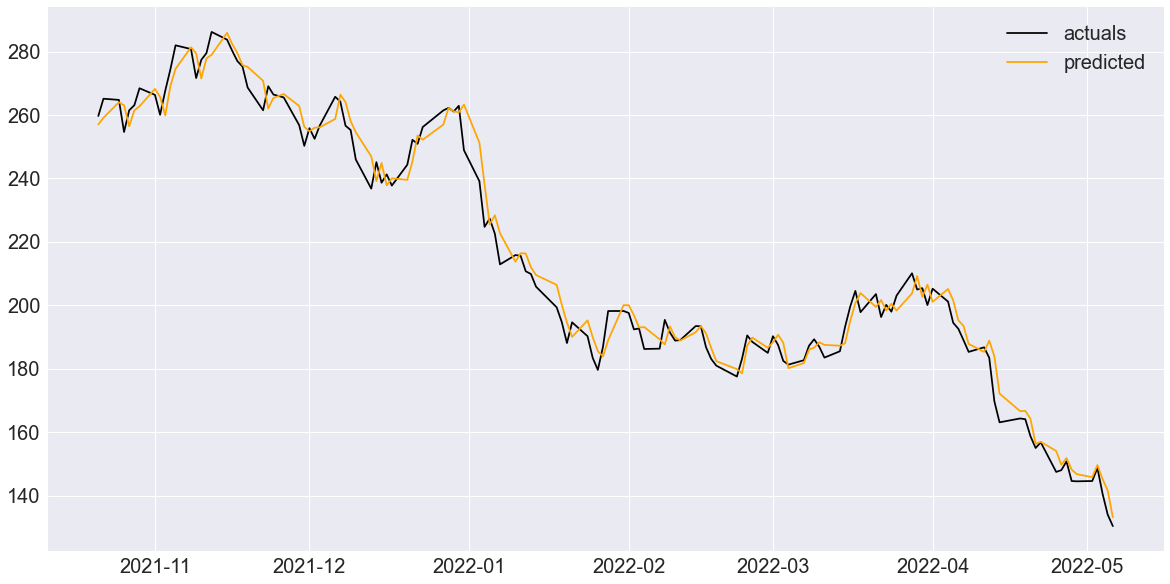

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['iipr_next_close'], color='black')
ax.plot(y_test0['iipr_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## IIPR and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_iipr, df_etfs, on='Date', how='left')
df1

iipr_Open   iipr_High    iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                      
2016-12-01   20.250000   20.520000   19.000000   19.150000      1191200   
2016-12-02   19.190001   19.500000   18.280001   18.450001       299400   
2016-12-05   18.450001   18.670000   14.500000   15.400000       917000   
2016-12-06   15.940000   16.954000   15.450000   16.650000       346200   
2016-12-07   17.610001   17.610001   16.650000   16.889999       244500   
...                ...         ...         ...         ...          ...   
2022-05-03  144.570007  146.442993  142.610001  144.589996       248500   
2022-05-04  146.889999  149.990005  142.899994  148.729996       375000   
2022-05-05  148.000000  148.550003  138.449997  140.610001       473600   
2022-05-06  139.160004  139.160004  132.570007  134.000000       516100   
2022-05-09  131.520004  136.345001  130.059998  130.380005       447600   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01              NaN        18.450001        NaN           NaN   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   
...                     ...              ...        ...           ...   
2022-05-03       144.500000       148.729996   0.089996      0.000623   
2022-05-04       144.589996       140.610001   4.140000      0.028633   
2022-05-05       148.729996       134.000000  -8.119995     -0.054596   
2022-05-06       140.610001       130.380005  -6.610001     -0.047009   
2022-05-09       134.000000              NaN  -3.619995     -0.027015   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                  NaN                 NaN                   NaN   
2016-12-02                  NaN                 NaN                   NaN   
2016-12-05                  NaN                 NaN                   NaN   
2016-12-06                  NaN                 NaN                   NaN   
2016-12-07            17.308000                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-03           146.495999           -0.574002            151.456001   
2022-05-04           146.637997            0.141998            149.921001   
2022-05-05           144.603998           -2.034000            148.108000   
2022-05-06           142.485999           -2.117999            146.008000   
2022-05-09           139.662000           -2.823999            143.366000   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01                  NaN  26.943001  26.943001  26.943001  26.943001   
2016-12-02                  NaN  26.943001  26.943001  26.943001  26.943001   
2016-12-05                  NaN  27.190001  27.212999  26.219999  27.212999   
2016-12-06                  NaN  27.289000  27.289000  27.259001  27.259001   
2016-12-07                  NaN  27.790001  27.790001  27.749001  27.749001   
...                         ...        ...        ...        ...        ...   
2022-05-03            -1.973001   8.340000   8.470000   8.240000   8.320000   
2022-05-04            -1.535001   8.340000   8.590000   8.100000   8.590000   
2022-05-05            -1.813000   8.500000   8.508000   8.010000   8.050000   
2022-05-06            -2.100000   8.010000   8.050000   7.750000   7.900000   
2022-05-09            -2.642000   7.790000   7.800000   7.440000   7.450000   

            mj_Volume  mj_prev_close  mj_next_close   mj_

In [41]:
df_isna1 = df1.isna()
df_isna1

iipr_Open  iipr_High  iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                  
2016-12-01      False      False     False       False        False   
2016-12-02      False      False     False       False        False   
2016-12-05      False      False     False       False        False   
2016-12-06      False      False     False       False        False   
2016-12-07      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-03      False      False     False       False        False   
2022-05-04      False      False     False       False        False   
2022-05-05      False      False     False       False        False   
2022-05-06      False      False     False       False        False   
2022-05-09      False      False     False       False        False   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01             True            False       True          True   
2016-12-02            False            False      False         False   
2016-12-05            False            False      False         False   
2016-12-06            False            False      False         False   
2016-12-07            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-03            False            False      False         False   
2022-05-04            False            False      False         False   
2022-05-05            False            False      False         False   
2022-05-06            False            False      False         False   
2022-05-09            False             True      False         False   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                 True                True                  True   
2016-12-02                 True                True                  True   
2016-12-05                 True                True                  True   
2016-12-06                 True                True                  True   
2016-12-07                False                True                  True   
...                         ...                 ...                   ...   
2022-05-03                False               False                 False   
2022-05-04                False               False                 False   
2022-05-05                False               False                 False   
2022-05-06                False               False                 False   
2022-05-09                False               False                 False   

            iipr_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2016-12-01                 True    False    False   False     False   
2016-12-02                 True    False    False   False     False   
2016-12-05                 True    False    False   False     False   
2016-12-06                 True    False    False   False     False   
2016-12-07                 True    False    False   False     False   
...                         ...      ...      ...     ...       ...   
2022-05-03                False    False    False   False     False   
2022-05-04                False    False    False   False     False   
2022-05-05                False    False    False   False     False   
2022-05-06                False    False    False   False     False   
2022-05-09                False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2016-12-01      False          False          False    False

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

iipr_Open  iipr_High   iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                   
2016-12-01  20.250000  20.520000  19.000000   19.150000      1191200   
2016-12-02  19.190001  19.500000  18.280001   18.450001       299400   
2016-12-05  18.450001  18.670000  14.500000   15.400000       917000   
2016-12-06  15.940000  16.954000  15.450000   16.650000       346200   
2016-12-07  17.610001  17.610001  16.650000   16.889999       244500   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01         0.000000        18.450001   0.000000      0.000000   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                0.000                 0.0                   0.0   
2016-12-02                0.000                 0.0                   0.0   
2016-12-05                0.000                 0.0                   0.0   
2016-12-06                0.000                 0.0                   0.0   
2016-12-07               17.308                 0.0                   0.0   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-02                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-05                  0.0  27.190001  27.212999  26.219999  27.212999   
2016-12-06                  0.0  27.289000  27.289000  27.259001  27.259001   
2016-12-07                  0.0  27.790001  27.790001  27.749001  27.749001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2016-12-01        400      27.709999      26.943001 -0.766998   -0.027679   
2016-12-02        100      26.943001      27.212999  0.000000    0.000000   
2016-12-05        600      26.943001      27.259001  0.269998    0.010021   
2016-12-06        800      27.212999      27.749001  0.046002    0.001690   
2016-12-07       1200      27.259001      27.930000  0.490000    0.017976   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2016-12-01          27.427800           -0.1194             27.5086   
2016-12-02          27.308400           -0.1194             27.4265   
2016-12-05          27.256400           -0.0520             27.4038   
2016-12-06          27.213600           -0.0428             27.3634   
2016-12-07          27.221401            0.0078             27.3843   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2016-12-01            -0.1057        0.0        0.0       0.0         0.0   
2016-12-02            -0.0821        0.0        0.0       0.0         0.0   
2016-12-05            -0.0227        0.0        0.0       0.0         0.0   
2016-12-06            -0.0404        0.0        0.0       0.0         0.0   
2016-12-07             0.0209        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2016-12-01          0.0              0.0              0.0        0.0   
2016-12-02          0.0              0.0              0.0        0.0   
2016-12-05          0.0            

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

iipr_Open   iipr_High    iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                      
2016-12-01   20.250000   20.520000   19.000000   19.150000      1191200   
2016-12-02   19.190001   19.500000   18.280001   18.450001       299400   
2016-12-05   18.450001   18.670000   14.500000   15.400000       917000   
2016-12-06   15.940000   16.954000   15.450000   16.650000       346200   
2016-12-07   17.610001   17.610001   16.650000   16.889999       244500   
...                ...         ...         ...         ...          ...   
2022-05-03  144.570007  146.442993  142.610001  144.589996       248500   
2022-05-04  146.889999  149.990005  142.899994  148.729996       375000   
2022-05-05  148.000000  148.550003  138.449997  140.610001       473600   
2022-05-06  139.160004  139.160004  132.570007  134.000000       516100   
2022-05-09  131.520004  136.345001  130.059998  130.380005       447600   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01         0.000000        18.450001   0.000000      0.000000   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   
...                     ...              ...        ...           ...   
2022-05-03       144.500000       148.729996   0.089996      0.000623   
2022-05-04       144.589996       140.610001   4.140000      0.028633   
2022-05-05       148.729996       134.000000  -8.119995     -0.054596   
2022-05-06       140.610001       130.380005  -6.610001     -0.047009   
2022-05-09       134.000000         0.000000  -3.619995     -0.027015   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01             0.000000            0.000000              0.000000   
2016-12-02             0.000000            0.000000              0.000000   
2016-12-05             0.000000            0.000000              0.000000   
2016-12-06             0.000000            0.000000              0.000000   
2016-12-07            17.308000            0.000000              0.000000   
...                         ...                 ...                   ...   
2022-05-03           146.495999           -0.574002            151.456001   
2022-05-04           146.637997            0.141998            149.921001   
2022-05-05           144.603998           -2.034000            148.108000   
2022-05-06           142.485999           -2.117999            146.008000   
2022-05-09           139.662000           -2.823999            143.366000   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01             0.000000  26.943001  26.943001  26.943001  26.943001   
2016-12-02             0.000000  26.943001  26.943001  26.943001  26.943001   
2016-12-05             0.000000  27.190001  27.212999  26.219999  27.212999   
2016-12-06             0.000000  27.289000  27.289000  27.259001  27.259001   
2016-12-07             0.000000  27.790001  27.790001  27.749001  27.749001   
...                         ...        ...        ...        ...        ...   
2022-05-03            -1.973001   8.340000   8.470000   8.240000   8.320000   
2022-05-04            -1.535001   8.340000   8.590000   8.100000   8.590000   
2022-05-05            -1.813000   8.500000   8.508000   8.010000   8.050000   
2022-05-06            -2.100000   8.010000   8.050000   7.750000   7.900000   
2022-05-09            -2.642000   7.790000   7.800000   7.440000   7.450000   

            mj_Volume  mj_prev_close  mj_next_close   mj_

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'iipr_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter   iipr_Open   iipr_High    iipr_Low  \
Date                                                                        
2016-12-01     12    1  2016        4   20.250000   20.520000   19.000000   
2016-12-02     12    2  2016        4   19.190001   19.500000   18.280001   
2016-12-05     12    5  2016        4   18.450001   18.670000   14.500000   
2016-12-06     12    6  2016        4   15.940000   16.954000   15.450000   
2016-12-07     12    7  2016        4   17.610001   17.610001   16.650000   
...           ...  ...   ...      ...         ...         ...         ...   
2022-05-03      5    3  2022        2  144.570007  146.442993  142.610001   
2022-05-04      5    4  2022        2  146.889999  149.990005  142.899994   
2022-05-05      5    5  2022        2  148.000000  148.550003  138.449997   
2022-05-06      5    6  2022        2  139.160004  139.160004  132.570007   
2022-05-09      5    9  2022        2  131.520004  136.345001  130.059998   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_next_close  \
Date                                                                    
2016-12-01   19.150000      1191200         0.000000        18.450001   
2016-12-02   18.450001       299400        19.150000        15.400000   
2016-12-05   15.400000       917000        18.450001        16.650000   
2016-12-06   16.650000       346200        15.400000        16.889999   
2016-12-07   16.889999       244500        16.650000        17.200001   
...                ...          ...              ...              ...   
2022-05-03  144.589996       248500       144.500000       148.729996   
2022-05-04  148.729996       375000       144.589996       140.610001   
2022-05-05  140.610001       473600       148.729996       134.000000   
2022-05-06  134.000000       516100       140.610001       130.380005   
2022-05-09  130.380005       447600       134.000000         0.000000   

            iipr_diff  iipr_%change  iipr_5day_avg_close  iipr_5day_avg_diff  \
Date                                                                           
2016-12-01   0.000000      0.000000             0.000000            0.000000   
2016-12-02  -0.699999     -0.036553             0.000000            0.000000   
2016-12-05  -3.050001     -0.165312             0.000000            0.000000   
2016-12-06   1.250000      0.081169             0.000000            0.000000   
2016-12-07   0.239999      0.014414            17.308000            0.000000   
...               ...           ...                  ...                 ...   
2022-05-03   0.089996      0.000623           146.495999           -0.574002   
2022-05-04   4.140000      0.028633           146.637997            0.141998   
2022-05-05  -8.119995     -0.054596           144.603998           -2.034000   
2022-05-06  -6.610001     -0.047009           142.485999           -2.117999   
2022-05-09  -3.619995     -0.027015           139.662000           -2.823999   

            iipr_10day_avg_close  iipr_10day_avg_diff    mj_Open    mj_High  \
Date                                                                          
2016-12-01              0.000000             0.000000  26.943001  26.943001   
2016-12-02              0.000000             0.000000  26.943001  26.943001   
2016-12-05              0.000000             0.000000  27.190001  27.212999   
2016-12-06              0.000000             0.000000  27.289000  27.289000   
2016-12-07              0.000000             0.000000  27.790001  27.790001   
...                          ...                  ...        ...        ...   
2022-05-03            151.456001            -1.973001   8.340000   8.470000   
2022-05-04            149.921001            -1.535001   8.340000   8.590000   
2022-05-05            148.108000            -1.813000   8.500000   8.508000   
2022-05-06            146.008000            -2.100000   8.010000   8.050000   
2022-05-09            143.366000            -2.642000   7.790000   7.80

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

1230

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

1230
137


In [52]:
X_train1 = train1.drop('iipr_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  iipr_Open  iipr_High   iipr_Low  \
Date                                                                     
2016-12-01     12    1  2016        4  20.250000      20.52  19.000000   
2016-12-02     12    2  2016        4  19.190001      19.50  18.280001   
2016-12-05     12    5  2016        4  18.450001      18.67  14.500000   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_diff  iipr_%change  \
Date                                                                            
2016-12-01   19.150000      1191200         0.000000   0.000000      0.000000   
2016-12-02   18.450001       299400        19.150000  -0.699999     -0.036553   
2016-12-05   15.400000       917000        18.450001  -3.050001     -0.165312   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                  0.0                 0.0                   0.0   
2016-12-02                  0.0                 0.0                   0.0   
2016-12-05                  0.0                 0.0                   0.0   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-02                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-05                  0.0  27.190001  27.212999  26.219999  27.212999   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2016-12-01        400      27.709999      26.943001 -0.766998   -0.027679   
2016-12-02        100      26.943001      27.212999  0.000000    0.000000   
2016-12-05        600      26.943001      27.259001  0.269998    0.010021   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2016-12-01            27.4278           -0.1194             27.5086   
2016-12-02            27.3084           -0.1194             27.4265   
2016-12-05            27.2564           -0.0520             27.4038   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2016-12-01            -0.1057        0.0        0.0       0.0         0.0   
2016-12-02            -0.0821        0.0        0.0       0.0         0.0   
2016-12-05            -0.0227        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2016-12-01          0.0              0.0              0.0        0.0   
2016-12-02          0.0              0.0              0.0        0.0   
2016-12-05          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2016-12-01           0.0                  0.0                 0.0   
2016-12-02           0.0                  0.0                 0.0   
2016-12-05           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2016-12-01                   0.0                  0.0        0.0        0.0   
2016-12-02                   0.0                  0.0        0.0        0.0   
2016-12-05                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2016-12-01       0.0         0.0          0.0              0.0   
2016-12-02       0.0    

In [53]:
X_train1.shape

(1230, 159)

In [54]:
y_train1 = train1['iipr_next_close']
y_train1.head(3)

Date
2016-12-01    18.450001
2016-12-02    15.400000
2016-12-05    16.650000
Name: iipr_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2021-10-18    246.309998
2021-10-19    252.679993
2021-10-20    256.690002
Name: iipr_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('iipr_next_close', axis=1)
y_test1 = test1['iipr_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter   iipr_Open   iipr_High    iipr_Low  \
Date                                                                        
2021-10-21     10   21  2021        4  254.000000  260.109985  252.679993   
2021-10-22     10   22  2021        4  257.660004  262.377991  256.899994   
2021-10-25     10   25  2021        4  262.760010  265.679993  260.500000   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_diff  iipr_%change  \
Date                                                                            
2021-10-21  256.690002       177400       252.679993   4.010009      0.015870   
2021-10-22  259.709991       154400       256.690002   3.019989      0.011765   
2021-10-25  265.140015       172000       259.709991   5.430024      0.020908   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2021-10-21           247.110001            2.770001            241.587001   
2021-10-22           251.241998            4.131998            244.305000   
2021-10-25           256.106000            4.864002            247.712001   

            iipr_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2021-10-21             1.983000    14.59    14.94   14.56     14.64   
2021-10-22             2.717999    14.64    14.65   14.16     14.21   
2021-10-25             3.407001    14.25    14.31   14.11     14.29   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2021-10-21     774700          14.63          14.21     0.01    0.000684   
2021-10-22    1266600          14.64          14.29    -0.43   -0.029372   
2021-10-25     665100          14.21          14.03     0.08    0.005630   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-10-21             14.390             0.048              14.319   
2021-10-22             14.402             0.012              14.311   
2021-10-25             14.478             0.076              14.333   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2021-10-21              0.016  29.500000  30.049999     29.16   29.360001   
2021-10-22             -0.008  29.389999  29.510000     28.33   28.420000   
2021-10-25              0.022  28.490000  28.690001     28.25   28.309999   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-10-21     526900.0        29.570000        28.420000  -0.209999   
2021-10-22     675300.0        29.360001        28.309999  -0.940001   
2021-10-25     593000.0        28.420000        27.790001  -0.110001   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2021-10-21     -0.007102               28.992               0.070   
2021-10-22     -0.032016               28.954              -0.038   
2021-10-25     -0.003871               29.032               0.078   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2021-10-21                29.379               -0.149  16.200001  16.620001   
2021-10-22                29.188               -0.191  16.180000  16.180000   
2021-10-25                29.002               -0.186  15.810000  15.910000   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2021-10-21     16.00   16.219999      73100.0        16.260000   
2021-10-22     15.75   15.840000      74700.0        1

In [58]:
X_test1.shape

(137, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-04    140.610001
2022-05-05    134.000000
2022-05-06    130.380005
Name: iipr_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([256.02436864, 260.52166909, 262.49664555, 262.60719146,
       258.75020245])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

5.527867331340211


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

4.461294050463486


In [64]:
hyper_table.append(dict(version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

In [65]:
y_train1 = pd.DataFrame(y_train1, columns=['iipr_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['iipr_next_close'])

In [66]:
y_test1['iipr_pred_next_close'] = y_pred1

In [67]:
y_test1.tail()

iipr_next_close  iipr_pred_next_close
Date                                             
2022-05-02       144.589996            146.981404
2022-05-03       148.729996            149.523917
2022-05-04       140.610001            148.071714
2022-05-05       134.000000            147.642490
2022-05-06       130.380005            133.689455

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['iipr_next_close'], color='black')
ax.plot(y_test1['iipr_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## IIPR, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_iipr, df_etfs_dow, on='Date', how='left')
df2

iipr_Open   iipr_High    iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                      
2016-12-01   20.250000   20.520000   19.000000   19.150000      1191200   
2016-12-02   19.190001   19.500000   18.280001   18.450001       299400   
2016-12-05   18.450001   18.670000   14.500000   15.400000       917000   
2016-12-06   15.940000   16.954000   15.450000   16.650000       346200   
2016-12-07   17.610001   17.610001   16.650000   16.889999       244500   
...                ...         ...         ...         ...          ...   
2022-05-03  144.570007  146.442993  142.610001  144.589996       248500   
2022-05-04  146.889999  149.990005  142.899994  148.729996       375000   
2022-05-05  148.000000  148.550003  138.449997  140.610001       473600   
2022-05-06  139.160004  139.160004  132.570007  134.000000       516100   
2022-05-09  131.520004  136.345001  130.059998  130.380005       447600   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01              NaN        18.450001        NaN           NaN   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   
...                     ...              ...        ...           ...   
2022-05-03       144.500000       148.729996   0.089996      0.000623   
2022-05-04       144.589996       140.610001   4.140000      0.028633   
2022-05-05       148.729996       134.000000  -8.119995     -0.054596   
2022-05-06       140.610001       130.380005  -6.610001     -0.047009   
2022-05-09       134.000000              NaN  -3.619995     -0.027015   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                  NaN                 NaN                   NaN   
2016-12-02                  NaN                 NaN                   NaN   
2016-12-05                  NaN                 NaN                   NaN   
2016-12-06                  NaN                 NaN                   NaN   
2016-12-07            17.308000                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-03           146.495999           -0.574002            151.456001   
2022-05-04           146.637997            0.141998            149.921001   
2022-05-05           144.603998           -2.034000            148.108000   
2022-05-06           142.485999           -2.117999            146.008000   
2022-05-09           139.662000           -2.823999            143.366000   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01                  NaN  26.943001  26.943001  26.943001  26.943001   
2016-12-02                  NaN  26.943001  26.943001  26.943001  26.943001   
2016-12-05                  NaN  27.190001  27.212999  26.219999  27.212999   
2016-12-06                  NaN  27.289000  27.289000  27.259001  27.259001   
2016-12-07                  NaN  27.790001  27.790001  27.749001  27.749001   
...                         ...        ...        ...        ...        ...   
2022-05-03            -1.973001   8.340000   8.470000   8.240000   8.320000   
2022-05-04            -1.535001   8.340000   8.590000   8.100000   8.590000   
2022-05-05            -1.813000   8.500000   8.508000   8.010000   8.050000   
2022-05-06            -2.100000   8.010000   8.050000   7.750000   7.900000   
2022-05-09            -2.642000   7.790000   7.800000   7.440000   7.450000   

            mj_Volume  mj_prev_close  mj_next_close   mj_

In [71]:
df_isna2 = df2.isna()
df_isna2

iipr_Open  iipr_High  iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                  
2016-12-01      False      False     False       False        False   
2016-12-02      False      False     False       False        False   
2016-12-05      False      False     False       False        False   
2016-12-06      False      False     False       False        False   
2016-12-07      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-03      False      False     False       False        False   
2022-05-04      False      False     False       False        False   
2022-05-05      False      False     False       False        False   
2022-05-06      False      False     False       False        False   
2022-05-09      False      False     False       False        False   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01             True            False       True          True   
2016-12-02            False            False      False         False   
2016-12-05            False            False      False         False   
2016-12-06            False            False      False         False   
2016-12-07            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-03            False            False      False         False   
2022-05-04            False            False      False         False   
2022-05-05            False            False      False         False   
2022-05-06            False            False      False         False   
2022-05-09            False             True      False         False   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                 True                True                  True   
2016-12-02                 True                True                  True   
2016-12-05                 True                True                  True   
2016-12-06                 True                True                  True   
2016-12-07                False                True                  True   
...                         ...                 ...                   ...   
2022-05-03                False               False                 False   
2022-05-04                False               False                 False   
2022-05-05                False               False                 False   
2022-05-06                False               False                 False   
2022-05-09                False               False                 False   

            iipr_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2016-12-01                 True    False    False   False     False   
2016-12-02                 True    False    False   False     False   
2016-12-05                 True    False    False   False     False   
2016-12-06                 True    False    False   False     False   
2016-12-07                 True    False    False   False     False   
...                         ...      ...      ...     ...       ...   
2022-05-03                False    False    False   False     False   
2022-05-04                False    False    False   False     False   
2022-05-05                False    False    False   False     False   
2022-05-06                False    False    False   False     False   
2022-05-09                False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2016-12-01      False          False          False    False

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

iipr_Open  iipr_High   iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                   
2016-12-01  20.250000  20.520000  19.000000   19.150000      1191200   
2016-12-02  19.190001  19.500000  18.280001   18.450001       299400   
2016-12-05  18.450001  18.670000  14.500000   15.400000       917000   
2016-12-06  15.940000  16.954000  15.450000   16.650000       346200   
2016-12-07  17.610001  17.610001  16.650000   16.889999       244500   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01         0.000000        18.450001   0.000000      0.000000   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                0.000                 0.0                   0.0   
2016-12-02                0.000                 0.0                   0.0   
2016-12-05                0.000                 0.0                   0.0   
2016-12-06                0.000                 0.0                   0.0   
2016-12-07               17.308                 0.0                   0.0   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-02                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-05                  0.0  27.190001  27.212999  26.219999  27.212999   
2016-12-06                  0.0  27.289000  27.289000  27.259001  27.259001   
2016-12-07                  0.0  27.790001  27.790001  27.749001  27.749001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2016-12-01        400      27.709999      26.943001 -0.766998   -0.027679   
2016-12-02        100      26.943001      27.212999  0.000000    0.000000   
2016-12-05        600      26.943001      27.259001  0.269998    0.010021   
2016-12-06        800      27.212999      27.749001  0.046002    0.001690   
2016-12-07       1200      27.259001      27.930000  0.490000    0.017976   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2016-12-01          27.427800           -0.1194             27.5086   
2016-12-02          27.308400           -0.1194             27.4265   
2016-12-05          27.256400           -0.0520             27.4038   
2016-12-06          27.213600           -0.0428             27.3634   
2016-12-07          27.221401            0.0078             27.3843   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2016-12-01            -0.1057        0.0        0.0       0.0         0.0   
2016-12-02            -0.0821        0.0        0.0       0.0         0.0   
2016-12-05            -0.0227        0.0        0.0       0.0         0.0   
2016-12-06            -0.0404        0.0        0.0       0.0         0.0   
2016-12-07             0.0209        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2016-12-01          0.0              0.0              0.0        0.0   
2016-12-02          0.0              0.0              0.0        0.0   
2016-12-05          0.0            

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

iipr_Open   iipr_High    iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                      
2016-12-01   20.250000   20.520000   19.000000   19.150000      1191200   
2016-12-02   19.190001   19.500000   18.280001   18.450001       299400   
2016-12-05   18.450001   18.670000   14.500000   15.400000       917000   
2016-12-06   15.940000   16.954000   15.450000   16.650000       346200   
2016-12-07   17.610001   17.610001   16.650000   16.889999       244500   
...                ...         ...         ...         ...          ...   
2022-05-03  144.570007  146.442993  142.610001  144.589996       248500   
2022-05-04  146.889999  149.990005  142.899994  148.729996       375000   
2022-05-05  148.000000  148.550003  138.449997  140.610001       473600   
2022-05-06  139.160004  139.160004  132.570007  134.000000       516100   
2022-05-09  131.520004  136.345001  130.059998  130.380005       447600   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01         0.000000        18.450001   0.000000      0.000000   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   
...                     ...              ...        ...           ...   
2022-05-03       144.500000       148.729996   0.089996      0.000623   
2022-05-04       144.589996       140.610001   4.140000      0.028633   
2022-05-05       148.729996       134.000000  -8.119995     -0.054596   
2022-05-06       140.610001       130.380005  -6.610001     -0.047009   
2022-05-09       134.000000         0.000000  -3.619995     -0.027015   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01             0.000000            0.000000              0.000000   
2016-12-02             0.000000            0.000000              0.000000   
2016-12-05             0.000000            0.000000              0.000000   
2016-12-06             0.000000            0.000000              0.000000   
2016-12-07            17.308000            0.000000              0.000000   
...                         ...                 ...                   ...   
2022-05-03           146.495999           -0.574002            151.456001   
2022-05-04           146.637997            0.141998            149.921001   
2022-05-05           144.603998           -2.034000            148.108000   
2022-05-06           142.485999           -2.117999            146.008000   
2022-05-09           139.662000           -2.823999            143.366000   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01             0.000000  26.943001  26.943001  26.943001  26.943001   
2016-12-02             0.000000  26.943001  26.943001  26.943001  26.943001   
2016-12-05             0.000000  27.190001  27.212999  26.219999  27.212999   
2016-12-06             0.000000  27.289000  27.289000  27.259001  27.259001   
2016-12-07             0.000000  27.790001  27.790001  27.749001  27.749001   
...                         ...        ...        ...        ...        ...   
2022-05-03            -1.973001   8.340000   8.470000   8.240000   8.320000   
2022-05-04            -1.535001   8.340000   8.590000   8.100000   8.590000   
2022-05-05            -1.813000   8.500000   8.508000   8.010000   8.050000   
2022-05-06            -2.100000   8.010000   8.050000   7.750000   7.900000   
2022-05-09            -2.642000   7.790000   7.800000   7.440000   7.450000   

            mj_Volume  mj_prev_close  mj_next_close   mj_

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'iipr_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter   iipr_Open   iipr_High    iipr_Low  \
Date                                                                        
2016-12-01     12    1  2016        4   20.250000   20.520000   19.000000   
2016-12-02     12    2  2016        4   19.190001   19.500000   18.280001   
2016-12-05     12    5  2016        4   18.450001   18.670000   14.500000   
2016-12-06     12    6  2016        4   15.940000   16.954000   15.450000   
2016-12-07     12    7  2016        4   17.610001   17.610001   16.650000   
...           ...  ...   ...      ...         ...         ...         ...   
2022-05-03      5    3  2022        2  144.570007  146.442993  142.610001   
2022-05-04      5    4  2022        2  146.889999  149.990005  142.899994   
2022-05-05      5    5  2022        2  148.000000  148.550003  138.449997   
2022-05-06      5    6  2022        2  139.160004  139.160004  132.570007   
2022-05-09      5    9  2022        2  131.520004  136.345001  130.059998   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_next_close  \
Date                                                                    
2016-12-01   19.150000      1191200         0.000000        18.450001   
2016-12-02   18.450001       299400        19.150000        15.400000   
2016-12-05   15.400000       917000        18.450001        16.650000   
2016-12-06   16.650000       346200        15.400000        16.889999   
2016-12-07   16.889999       244500        16.650000        17.200001   
...                ...          ...              ...              ...   
2022-05-03  144.589996       248500       144.500000       148.729996   
2022-05-04  148.729996       375000       144.589996       140.610001   
2022-05-05  140.610001       473600       148.729996       134.000000   
2022-05-06  134.000000       516100       140.610001       130.380005   
2022-05-09  130.380005       447600       134.000000         0.000000   

            iipr_diff  iipr_%change  iipr_5day_avg_close  iipr_5day_avg_diff  \
Date                                                                           
2016-12-01   0.000000      0.000000             0.000000            0.000000   
2016-12-02  -0.699999     -0.036553             0.000000            0.000000   
2016-12-05  -3.050001     -0.165312             0.000000            0.000000   
2016-12-06   1.250000      0.081169             0.000000            0.000000   
2016-12-07   0.239999      0.014414            17.308000            0.000000   
...               ...           ...                  ...                 ...   
2022-05-03   0.089996      0.000623           146.495999           -0.574002   
2022-05-04   4.140000      0.028633           146.637997            0.141998   
2022-05-05  -8.119995     -0.054596           144.603998           -2.034000   
2022-05-06  -6.610001     -0.047009           142.485999           -2.117999   
2022-05-09  -3.619995     -0.027015           139.662000           -2.823999   

            iipr_10day_avg_close  iipr_10day_avg_diff    mj_Open    mj_High  \
Date                                                                          
2016-12-01              0.000000             0.000000  26.943001  26.943001   
2016-12-02              0.000000             0.000000  26.943001  26.943001   
2016-12-05              0.000000             0.000000  27.190001  27.212999   
2016-12-06              0.000000             0.000000  27.289000  27.289000   
2016-12-07              0.000000             0.000000  27.790001  27.790001   
...                          ...                  ...        ...        ...   
2022-05-03            151.456001            -1.973001   8.340000   8.470000   
2022-05-04            149.921001            -1.535001   8.340000   8.590000   
2022-05-05            148.108000            -1.813000   8.500000   8.508000   
2022-05-06            146.008000            -2.100000   8.010000   8.050000   
2022-05-09            143.366000            -2.642000   7.790000   7.80

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

1230

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

1230
137


In [82]:
X_train2 = train2.drop('iipr_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  iipr_Open  iipr_High   iipr_Low  \
Date                                                                     
2016-12-01     12    1  2016        4  20.250000      20.52  19.000000   
2016-12-02     12    2  2016        4  19.190001      19.50  18.280001   
2016-12-05     12    5  2016        4  18.450001      18.67  14.500000   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_diff  iipr_%change  \
Date                                                                            
2016-12-01   19.150000      1191200         0.000000   0.000000      0.000000   
2016-12-02   18.450001       299400        19.150000  -0.699999     -0.036553   
2016-12-05   15.400000       917000        18.450001  -3.050001     -0.165312   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                  0.0                 0.0                   0.0   
2016-12-02                  0.0                 0.0                   0.0   
2016-12-05                  0.0                 0.0                   0.0   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-02                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-05                  0.0  27.190001  27.212999  26.219999  27.212999   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2016-12-01        400      27.709999      26.943001 -0.766998   -0.027679   
2016-12-02        100      26.943001      27.212999  0.000000    0.000000   
2016-12-05        600      26.943001      27.259001  0.269998    0.010021   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2016-12-01            27.4278           -0.1194             27.5086   
2016-12-02            27.3084           -0.1194             27.4265   
2016-12-05            27.2564           -0.0520             27.4038   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2016-12-01            -0.1057        0.0        0.0       0.0         0.0   
2016-12-02            -0.0821        0.0        0.0       0.0         0.0   
2016-12-05            -0.0227        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2016-12-01          0.0              0.0              0.0        0.0   
2016-12-02          0.0              0.0              0.0        0.0   
2016-12-05          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2016-12-01           0.0                  0.0                 0.0   
2016-12-02           0.0                  0.0                 0.0   
2016-12-05           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2016-12-01                   0.0                  0.0        0.0        0.0   
2016-12-02                   0.0                  0.0        0.0        0.0   
2016-12-05                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2016-12-01       0.0         0.0          0.0              0.0   
2016-12-02       0.0    

In [83]:
X_train2.shape

(1230, 185)

In [84]:
y_train2 = train2['iipr_next_close']
y_train2.head(3)

Date
2016-12-01    18.450001
2016-12-02    15.400000
2016-12-05    16.650000
Name: iipr_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2021-10-18    246.309998
2021-10-19    252.679993
2021-10-20    256.690002
Name: iipr_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('iipr_next_close', axis=1)
y_test2 = test2['iipr_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter   iipr_Open   iipr_High    iipr_Low  \
Date                                                                        
2021-10-21     10   21  2021        4  254.000000  260.109985  252.679993   
2021-10-22     10   22  2021        4  257.660004  262.377991  256.899994   
2021-10-25     10   25  2021        4  262.760010  265.679993  260.500000   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_diff  iipr_%change  \
Date                                                                            
2021-10-21  256.690002       177400       252.679993   4.010009      0.015870   
2021-10-22  259.709991       154400       256.690002   3.019989      0.011765   
2021-10-25  265.140015       172000       259.709991   5.430024      0.020908   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2021-10-21           247.110001            2.770001            241.587001   
2021-10-22           251.241998            4.131998            244.305000   
2021-10-25           256.106000            4.864002            247.712001   

            iipr_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2021-10-21             1.983000    14.59    14.94   14.56     14.64   
2021-10-22             2.717999    14.64    14.65   14.16     14.21   
2021-10-25             3.407001    14.25    14.31   14.11     14.29   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2021-10-21     774700          14.63          14.21     0.01    0.000684   
2021-10-22    1266600          14.64          14.29    -0.43   -0.029372   
2021-10-25     665100          14.21          14.03     0.08    0.005630   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-10-21             14.390             0.048              14.319   
2021-10-22             14.402             0.012              14.311   
2021-10-25             14.478             0.076              14.333   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2021-10-21              0.016  29.500000  30.049999     29.16   29.360001   
2021-10-22             -0.008  29.389999  29.510000     28.33   28.420000   
2021-10-25              0.022  28.490000  28.690001     28.25   28.309999   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-10-21     526900.0        29.570000        28.420000  -0.209999   
2021-10-22     675300.0        29.360001        28.309999  -0.940001   
2021-10-25     593000.0        28.420000        27.790001  -0.110001   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2021-10-21     -0.007102               28.992               0.070   
2021-10-22     -0.032016               28.954              -0.038   
2021-10-25     -0.003871               29.032               0.078   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2021-10-21                29.379               -0.149  16.200001  16.620001   
2021-10-22                29.188               -0.191  16.180000  16.180000   
2021-10-25                29.002               -0.186  15.810000  15.910000   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2021-10-21     16.00   16.219999      73100.0        16.260000   
2021-10-22     15.75   15.840000      74700.0        1

In [88]:
X_test2.shape

(137, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-04    140.610001
2022-05-05    134.000000
2022-05-06    130.380005
Name: iipr_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([256.51439493, 260.31482117, 262.41546447, 262.12177828,
       259.24675707])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

5.557260721137782


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

4.418109796480507


In [94]:
hyper_table.append(dict(version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

In [95]:
y_train2 = pd.DataFrame(y_train2, columns=['iipr_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['iipr_next_close'])

In [96]:
y_test2['iipr_pred_next_close'] = y_pred2

In [97]:
y_test2.tail()

iipr_next_close  iipr_pred_next_close
Date                                             
2022-05-02       144.589996            147.078469
2022-05-03       148.729996            152.649249
2022-05-04       140.610001            145.986976
2022-05-05       134.000000            146.634339
2022-05-06       130.380005            131.543923

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['iipr_next_close'], color='black')
ax.plot(y_test2['iipr_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (IIPR target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   
2016-12-06     12    6  2016        4     8.021     8.150    7.360      7.549   
2016-12-07     12    7  2016        4     7.288     8.105    7.254      8.081   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   
2016-12-06      437700           8.130           8.081    -0.581    -0.071464   
2016-12-07      351600           7.549           7.573     0.532     0.070473   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   
2016-12-06              8.3152            -0.1682               8.0041   
2016-12-07              8.1754            -0.1398               8.1822   
...                        ...                ...                  ...   
2022-05-03              5.7000             0.1520               5.6420   
2022-05-04              5.9880             0.2880               5.7360   
2022-05-05              6.1120             0.1240               5.7680   
2022-05-06              6.1640             0.0520               5.8080   
2022-05-09              6.0640            -0.1000               5.8060   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056        0.00       0.000       0.00   
2016-12-02             -0.1126        0.00       0.000       0.00   
2016-12-05             -0.1166        0.00       0.000       0.00   
2016-12-06             -0.0250        0.00       0.000       0.00   
2016-12-07              0.1781        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03              0.0130        4.50       4.750       4.20   
2022-05-04              0.0940        4.22       4.414       4.05   
2022-05-05              0.0320        4.20       4.250       4.02   
2022-05-06              0.0400        3.92       4.340       3.82   
2022-05-09             -0.0020        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

1230

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

1230
137


In [112]:
X_train3 = train3.drop('iipr_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056         0.0         0.0        0.0   
2016-12-02             -0.1126         0.0         0.0        0.0   
2016-12-05             -0.1166         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2016-12-01          0.0           0.0               0.0               0.0   
2016-12-02          0.0           0.0               0.0               0.0   
2016-12-05          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2016-12-01         0.0            0.0                   0.0   
2016-12-02         0.0            0.0                   0.0   
2016-12-05         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2016-12-01                  0.0                    0.0                   0.0   
2016-12-02                  0.0                    0.0                   0.0   
2016-12-05                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2016-12-01        0.0        0.0       0.0         0.0          0.0   
2016-12-02        0.0        0.0       0.0         0.0          0.0   
2016-12-05        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2016-12-01              0.0              0.0        0.0           0.0   
2016-12-02              0.0              0.0        0.0           0.0   
2016-12-05              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2016-12-01                  0.0                 0.0                   0.0   
2016-12-02                  0.0                 0.0                   0.0   
2016-12-05                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2016-12-01                  0.0         0.0         0.0        0.0   
2016-12-02                  0.0         0.0         0.0       

In [113]:
X_train3.shape

(1230, 263)

In [114]:
y_train3 = train3['iipr_next_close']
y_train3.head(3)

Date
2016-12-01    18.450001
2016-12-02    15.400000
2016-12-05    16.650000
Name: iipr_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2021-10-18    246.309998
2021-10-19    252.679993
2021-10-20    256.690002
Name: iipr_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('iipr_next_close', axis=1)
y_test3 = test3['iipr_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-10-21     10   21  2021        4    14.159     14.65    13.95      14.04   
2021-10-22     10   22  2021        4    13.980     14.13    13.25      13.38   
2021-10-25     10   25  2021        4    13.380     13.63    13.13      13.57   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-10-21     5333000           14.11           13.38     -0.07    -0.004961   
2021-10-22     5091500           14.04           13.57     -0.66    -0.047009   
2021-10-25     4190400           13.38           13.17      0.19     0.014200   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-10-21              13.808              0.068               13.543   
2021-10-22              13.814              0.006               13.559   
2021-10-25              13.888              0.074               13.611   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-10-21               0.053       8.480       8.630        8.2   
2021-10-22               0.016       8.215       8.280        8.0   
2021-10-25               0.052       8.045       8.287        7.9   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-10-21         8.20      436000.0             8.484              8.02   
2021-10-22         8.02      480900.0             8.200              7.92   
2021-10-25         7.92      549500.0             8.020              7.81   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-10-21      -0.284      -0.033475                8.2246   
2021-10-22      -0.180      -0.021951                8.2188   
2021-10-25      -0.100      -0.012469                8.2108   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-10-21              -0.0200                 8.2477               -0.0205   
2021-10-22              -0.0058                 8.2325               -0.0152   
2021-10-25              -0.0080                 8.1891               -0.0434   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-10-21       5.78       6.05     5.770        5.95    3423400.0   
2021-10-22       5.95       5.95     5.600        5.65    2002600.0   
2021-10-25       5.62       5.64     5.495        5.56    2023100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-10-21             5.80             5.65       0.15      0.025862   
2021-10-22             5.95             5.56      -0.30     -0.050420   
2021-10-25             5.65             5.48      -0.09     -0.015929   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-10-21                5.680               0.084                 5.561   
2021-10-22                5.714               0.034                 5.578   
2021-10-25                5.754               0.040                 5.597   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-10-21                0.037       11.43       11.45      10.50   
2021-10-22                0.017       10.58       10.79      1

In [118]:
X_test3.shape

(137, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-04    140.610001
2022-05-05    134.000000
2022-05-06    130.380005
Name: iipr_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([256.38334132, 258.69344698, 260.61935743, 261.13743879,
       253.51430254])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

6.930270911134343


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

5.804915405884391


In [124]:
hyper_table.append(dict(version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

In [125]:
y_train3 = pd.DataFrame(y_train3, columns=['iipr_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['iipr_next_close'])

In [126]:
y_test3['iipr_pred_next_close'] = y_pred3

In [127]:
y_test3.tail()

iipr_next_close  iipr_pred_next_close
Date                                             
2022-05-02       144.589996            150.412456
2022-05-03       148.729996            152.304543
2022-05-04       140.610001            155.301633
2022-05-05       134.000000            152.652411
2022-05-06       130.380005            143.306491

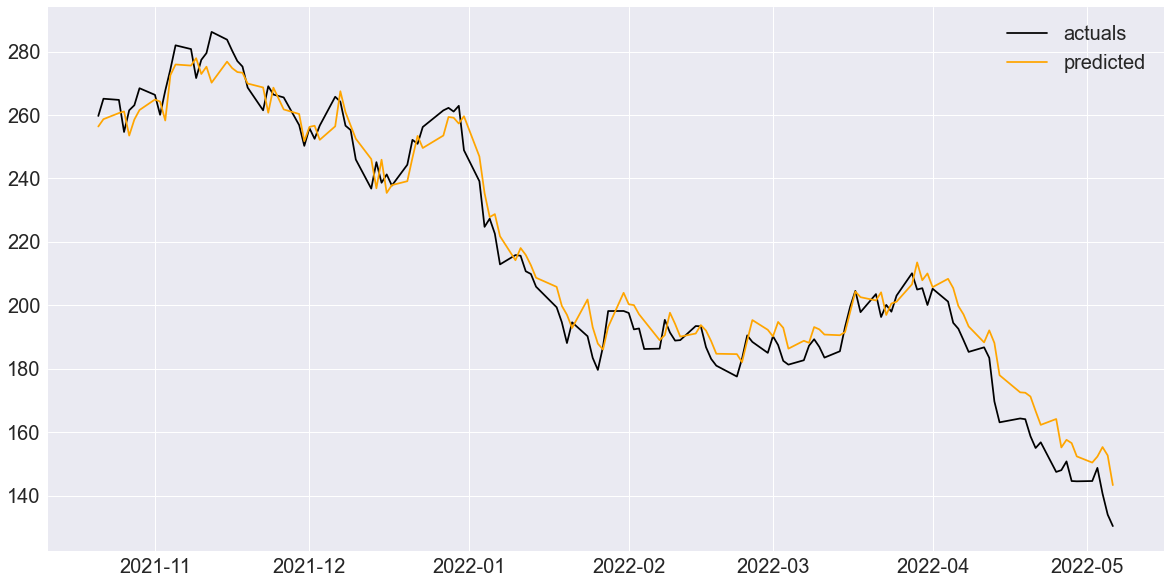

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['iipr_next_close'], color='black')
ax.plot(y_test3['iipr_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (IIPR target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   
2016-12-06     12    6  2016        4     8.021     8.150    7.360      7.549   
2016-12-07     12    7  2016        4     7.288     8.105    7.254      8.081   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   
2016-12-06      437700           8.130           8.081    -0.581    -0.071464   
2016-12-07      351600           7.549           7.573     0.532     0.070473   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   
2016-12-06              8.3152            -0.1682               8.0041   
2016-12-07              8.1754            -0.1398               8.1822   
...                        ...                ...                  ...   
2022-05-03              5.7000             0.1520               5.6420   
2022-05-04              5.9880             0.2880               5.7360   
2022-05-05              6.1120             0.1240               5.7680   
2022-05-06              6.1640             0.0520               5.8080   
2022-05-09              6.0640            -0.1000               5.8060   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056        0.00       0.000       0.00   
2016-12-02             -0.1126        0.00       0.000       0.00   
2016-12-05             -0.1166        0.00       0.000       0.00   
2016-12-06             -0.0250        0.00       0.000       0.00   
2016-12-07              0.1781        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03              0.0130        4.50       4.750       4.20   
2022-05-04              0.0940        4.22       4.414       4.05   
2022-05-05              0.0320        4.20       4.250       4.02   
2022-05-06              0.0400        3.92       4.340       3.82   
2022-05-09             -0.0020        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

1230

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

1230
137


In [142]:
X_train4 = train4.drop('iipr_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056         0.0         0.0        0.0   
2016-12-02             -0.1126         0.0         0.0        0.0   
2016-12-05             -0.1166         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2016-12-01          0.0           0.0               0.0               0.0   
2016-12-02          0.0           0.0               0.0               0.0   
2016-12-05          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2016-12-01         0.0            0.0                   0.0   
2016-12-02         0.0            0.0                   0.0   
2016-12-05         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2016-12-01                  0.0                    0.0                   0.0   
2016-12-02                  0.0                    0.0                   0.0   
2016-12-05                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2016-12-01        0.0        0.0       0.0         0.0          0.0   
2016-12-02        0.0        0.0       0.0         0.0          0.0   
2016-12-05        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2016-12-01              0.0              0.0        0.0           0.0   
2016-12-02              0.0              0.0        0.0           0.0   
2016-12-05              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2016-12-01                  0.0                 0.0                   0.0   
2016-12-02                  0.0                 0.0                   0.0   
2016-12-05                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2016-12-01                  0.0         0.0         0.0        0.0   
2016-12-02                  0.0         0.0         0.0       

In [143]:
X_train4.shape

(1230, 289)

In [144]:
y_train4 = train4['iipr_next_close']
y_train4.head(3)

Date
2016-12-01    18.450001
2016-12-02    15.400000
2016-12-05    16.650000
Name: iipr_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2021-10-18    246.309998
2021-10-19    252.679993
2021-10-20    256.690002
Name: iipr_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('iipr_next_close', axis=1)
y_test4 = test4['iipr_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-10-21     10   21  2021        4    14.159     14.65    13.95      14.04   
2021-10-22     10   22  2021        4    13.980     14.13    13.25      13.38   
2021-10-25     10   25  2021        4    13.380     13.63    13.13      13.57   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-10-21     5333000           14.11           13.38     -0.07    -0.004961   
2021-10-22     5091500           14.04           13.57     -0.66    -0.047009   
2021-10-25     4190400           13.38           13.17      0.19     0.014200   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-10-21              13.808              0.068               13.543   
2021-10-22              13.814              0.006               13.559   
2021-10-25              13.888              0.074               13.611   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-10-21               0.053       8.480       8.630        8.2   
2021-10-22               0.016       8.215       8.280        8.0   
2021-10-25               0.052       8.045       8.287        7.9   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-10-21         8.20      436000.0             8.484              8.02   
2021-10-22         8.02      480900.0             8.200              7.92   
2021-10-25         7.92      549500.0             8.020              7.81   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-10-21      -0.284      -0.033475                8.2246   
2021-10-22      -0.180      -0.021951                8.2188   
2021-10-25      -0.100      -0.012469                8.2108   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-10-21              -0.0200                 8.2477               -0.0205   
2021-10-22              -0.0058                 8.2325               -0.0152   
2021-10-25              -0.0080                 8.1891               -0.0434   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-10-21       5.78       6.05     5.770        5.95    3423400.0   
2021-10-22       5.95       5.95     5.600        5.65    2002600.0   
2021-10-25       5.62       5.64     5.495        5.56    2023100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-10-21             5.80             5.65       0.15      0.025862   
2021-10-22             5.95             5.56      -0.30     -0.050420   
2021-10-25             5.65             5.48      -0.09     -0.015929   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-10-21                5.680               0.084                 5.561   
2021-10-22                5.714               0.034                 5.578   
2021-10-25                5.754               0.040                 5.597   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-10-21                0.037       11.43       11.45      10.50   
2021-10-22                0.017       10.58       10.79      1

In [148]:
X_test4.shape

(137, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-04    140.610001
2022-05-05    134.000000
2022-05-06    130.380005
Name: iipr_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([257.08487512, 259.09071979, 261.16958625, 261.0131076 ,
       254.9146578 ])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

6.69770704587274


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

5.562722185048713


In [154]:
hyper_table.append(dict(version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

In [155]:
y_train4 = pd.DataFrame(y_train4, columns=['iipr_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['iipr_next_close'])

In [156]:
y_test4['iipr_pred_next_close'] = y_pred4

In [157]:
y_test4.tail()

iipr_next_close  iipr_pred_next_close
Date                                             
2022-05-02       144.589996            150.572044
2022-05-03       148.729996            155.415446
2022-05-04       140.610001            152.105869
2022-05-05       134.000000            151.748512
2022-05-06       130.380005            141.265089

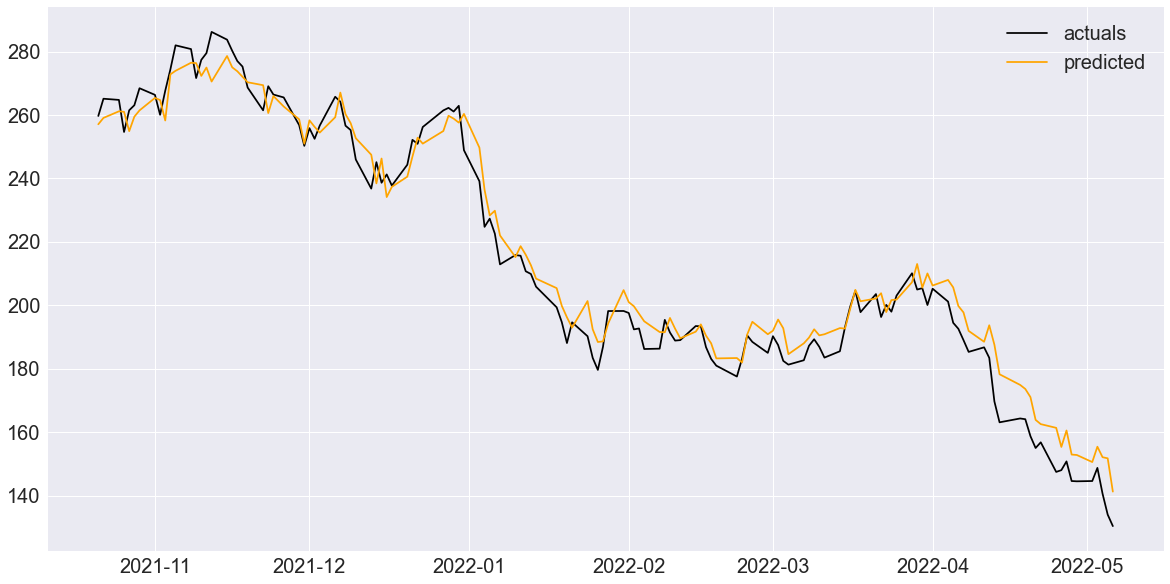

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['iipr_next_close'], color='black')
ax.plot(y_test4['iipr_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (IIPR target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   
2016-12-06     12    6  2016        4     8.021     8.150    7.360      7.549   
2016-12-07     12    7  2016        4     7.288     8.105    7.254      8.081   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   
2016-12-06      437700           8.130           8.081    -0.581    -0.071464   
2016-12-07      351600           7.549           7.573     0.532     0.070473   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   
2016-12-06              8.3152            -0.1682               8.0041   
2016-12-07              8.1754            -0.1398               8.1822   
...                        ...                ...                  ...   
2022-05-03              5.7000             0.1520               5.6420   
2022-05-04              5.9880             0.2880               5.7360   
2022-05-05              6.1120             0.1240               5.7680   
2022-05-06              6.1640             0.0520               5.8080   
2022-05-09              6.0640            -0.1000               5.8060   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056        0.00       0.000       0.00   
2016-12-02             -0.1126        0.00       0.000       0.00   
2016-12-05             -0.1166        0.00       0.000       0.00   
2016-12-06             -0.0250        0.00       0.000       0.00   
2016-12-07              0.1781        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03              0.0130        4.50       4.750       4.20   
2022-05-04              0.0940        4.22       4.414       4.05   
2022-05-05              0.0320        4.20       4.250       4.02   
2022-05-06              0.0400        3.92       4.340       3.82   
2022-05-09             -0.0020        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

1230

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

1230
137


In [172]:
X_train5 = train5.drop('iipr_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056         0.0         0.0        0.0   
2016-12-02             -0.1126         0.0         0.0        0.0   
2016-12-05             -0.1166         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2016-12-01          0.0           0.0               0.0               0.0   
2016-12-02          0.0           0.0               0.0               0.0   
2016-12-05          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2016-12-01         0.0            0.0                   0.0   
2016-12-02         0.0            0.0                   0.0   
2016-12-05         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2016-12-01                  0.0                    0.0                   0.0   
2016-12-02                  0.0                    0.0                   0.0   
2016-12-05                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2016-12-01        0.0        0.0       0.0         0.0          0.0   
2016-12-02        0.0        0.0       0.0         0.0          0.0   
2016-12-05        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2016-12-01              0.0              0.0        0.0           0.0   
2016-12-02              0.0              0.0        0.0           0.0   
2016-12-05              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2016-12-01                  0.0                 0.0                   0.0   
2016-12-02                  0.0                 0.0                   0.0   
2016-12-05                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2016-12-01                  0.0         0.0         0.0        0.0   
2016-12-02                  0.0         0.0         0.0       

In [173]:
X_train5.shape

(1230, 393)

In [174]:
y_train5 = train5['iipr_next_close']
y_train5.head(3)

Date
2016-12-01    18.450001
2016-12-02    15.400000
2016-12-05    16.650000
Name: iipr_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2021-10-18    246.309998
2021-10-19    252.679993
2021-10-20    256.690002
Name: iipr_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('iipr_next_close', axis=1)
y_test5 = test5['iipr_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-10-21     10   21  2021        4    14.159     14.65    13.95      14.04   
2021-10-22     10   22  2021        4    13.980     14.13    13.25      13.38   
2021-10-25     10   25  2021        4    13.380     13.63    13.13      13.57   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-10-21     5333000           14.11           13.38     -0.07    -0.004961   
2021-10-22     5091500           14.04           13.57     -0.66    -0.047009   
2021-10-25     4190400           13.38           13.17      0.19     0.014200   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-10-21              13.808              0.068               13.543   
2021-10-22              13.814              0.006               13.559   
2021-10-25              13.888              0.074               13.611   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-10-21               0.053       8.480       8.630        8.2   
2021-10-22               0.016       8.215       8.280        8.0   
2021-10-25               0.052       8.045       8.287        7.9   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-10-21         8.20      436000.0             8.484              8.02   
2021-10-22         8.02      480900.0             8.200              7.92   
2021-10-25         7.92      549500.0             8.020              7.81   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-10-21      -0.284      -0.033475                8.2246   
2021-10-22      -0.180      -0.021951                8.2188   
2021-10-25      -0.100      -0.012469                8.2108   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-10-21              -0.0200                 8.2477               -0.0205   
2021-10-22              -0.0058                 8.2325               -0.0152   
2021-10-25              -0.0080                 8.1891               -0.0434   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-10-21       5.78       6.05     5.770        5.95    3423400.0   
2021-10-22       5.95       5.95     5.600        5.65    2002600.0   
2021-10-25       5.62       5.64     5.495        5.56    2023100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-10-21             5.80             5.65       0.15      0.025862   
2021-10-22             5.95             5.56      -0.30     -0.050420   
2021-10-25             5.65             5.48      -0.09     -0.015929   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-10-21                5.680               0.084                 5.561   
2021-10-22                5.714               0.034                 5.578   
2021-10-25                5.754               0.040                 5.597   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-10-21                0.037       11.43       11.45      10.50   
2021-10-22                0.017       10.58       10.79      1

In [178]:
X_test5.shape

(137, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-04    140.610001
2022-05-05    134.000000
2022-05-06    130.380005
Name: iipr_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([255.6796021 , 257.29798957, 258.94202104, 259.06205612,
       255.17853264])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

8.866172858527289


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

7.372257841226692


In [184]:
hyper_table.append(dict(version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

In [185]:
y_train5 = pd.DataFrame(y_train5, columns=['iipr_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['iipr_next_close'])

In [186]:
y_test5['iipr_pred_next_close'] = y_pred5

In [187]:
y_test5.tail()

iipr_next_close  iipr_pred_next_close
Date                                             
2022-05-02       144.589996            156.117589
2022-05-03       148.729996            158.235604
2022-05-04       140.610001            157.562572
2022-05-05       134.000000            155.862114
2022-05-06       130.380005            146.560961

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['iipr_next_close'], color='black')
ax.plot(y_test5['iipr_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (IIPR target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   
2016-12-06     12    6  2016        4     8.021     8.150    7.360      7.549   
2016-12-07     12    7  2016        4     7.288     8.105    7.254      8.081   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   
2016-12-06      437700           8.130           8.081    -0.581    -0.071464   
2016-12-07      351600           7.549           7.573     0.532     0.070473   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   
2016-12-06              8.3152            -0.1682               8.0041   
2016-12-07              8.1754            -0.1398               8.1822   
...                        ...                ...                  ...   
2022-05-03              5.7000             0.1520               5.6420   
2022-05-04              5.9880             0.2880               5.7360   
2022-05-05              6.1120             0.1240               5.7680   
2022-05-06              6.1640             0.0520               5.8080   
2022-05-09              6.0640            -0.1000               5.8060   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056        0.00       0.000       0.00   
2016-12-02             -0.1126        0.00       0.000       0.00   
2016-12-05             -0.1166        0.00       0.000       0.00   
2016-12-06             -0.0250        0.00       0.000       0.00   
2016-12-07              0.1781        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03              0.0130        4.50       4.750       4.20   
2022-05-04              0.0940        4.22       4.414       4.05   
2022-05-05              0.0320        4.20       4.250       4.02   
2022-05-06              0.0400        3.92       4.340       3.82   
2022-05-09             -0.0020        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

1230

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

1230
137


In [202]:
X_train6 = train6.drop('iipr_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056         0.0         0.0        0.0   
2016-12-02             -0.1126         0.0         0.0        0.0   
2016-12-05             -0.1166         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2016-12-01          0.0           0.0               0.0               0.0   
2016-12-02          0.0           0.0               0.0               0.0   
2016-12-05          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2016-12-01         0.0            0.0                   0.0   
2016-12-02         0.0            0.0                   0.0   
2016-12-05         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2016-12-01                  0.0                    0.0                   0.0   
2016-12-02                  0.0                    0.0                   0.0   
2016-12-05                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2016-12-01        0.0        0.0       0.0         0.0          0.0   
2016-12-02        0.0        0.0       0.0         0.0          0.0   
2016-12-05        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2016-12-01              0.0              0.0        0.0           0.0   
2016-12-02              0.0              0.0        0.0           0.0   
2016-12-05              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2016-12-01                  0.0                 0.0                   0.0   
2016-12-02                  0.0                 0.0                   0.0   
2016-12-05                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2016-12-01                  0.0         0.0         0.0        0.0   
2016-12-02                  0.0         0.0         0.0       

In [203]:
X_train6.shape

(1230, 419)

In [204]:
y_train6 = train6['iipr_next_close']
y_train6.head(3)

Date
2016-12-01    18.450001
2016-12-02    15.400000
2016-12-05    16.650000
Name: iipr_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2021-10-18    246.309998
2021-10-19    252.679993
2021-10-20    256.690002
Name: iipr_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('iipr_next_close', axis=1)
y_test6 = test6['iipr_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-10-21     10   21  2021        4    14.159     14.65    13.95      14.04   
2021-10-22     10   22  2021        4    13.980     14.13    13.25      13.38   
2021-10-25     10   25  2021        4    13.380     13.63    13.13      13.57   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-10-21     5333000           14.11           13.38     -0.07    -0.004961   
2021-10-22     5091500           14.04           13.57     -0.66    -0.047009   
2021-10-25     4190400           13.38           13.17      0.19     0.014200   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-10-21              13.808              0.068               13.543   
2021-10-22              13.814              0.006               13.559   
2021-10-25              13.888              0.074               13.611   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-10-21               0.053       8.480       8.630        8.2   
2021-10-22               0.016       8.215       8.280        8.0   
2021-10-25               0.052       8.045       8.287        7.9   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-10-21         8.20      436000.0             8.484              8.02   
2021-10-22         8.02      480900.0             8.200              7.92   
2021-10-25         7.92      549500.0             8.020              7.81   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-10-21      -0.284      -0.033475                8.2246   
2021-10-22      -0.180      -0.021951                8.2188   
2021-10-25      -0.100      -0.012469                8.2108   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-10-21              -0.0200                 8.2477               -0.0205   
2021-10-22              -0.0058                 8.2325               -0.0152   
2021-10-25              -0.0080                 8.1891               -0.0434   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-10-21       5.78       6.05     5.770        5.95    3423400.0   
2021-10-22       5.95       5.95     5.600        5.65    2002600.0   
2021-10-25       5.62       5.64     5.495        5.56    2023100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-10-21             5.80             5.65       0.15      0.025862   
2021-10-22             5.95             5.56      -0.30     -0.050420   
2021-10-25             5.65             5.48      -0.09     -0.015929   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-10-21                5.680               0.084                 5.561   
2021-10-22                5.714               0.034                 5.578   
2021-10-25                5.754               0.040                 5.597   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-10-21                0.037       11.43       11.45      10.50   
2021-10-22                0.017       10.58       10.79      1

In [208]:
X_test6.shape

(137, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-04    140.610001
2022-05-05    134.000000
2022-05-06    130.380005
Name: iipr_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([256.75443319, 257.97660919, 259.17871912, 259.31737984,
       256.47413367])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

8.545953806926562


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

7.102156349540845


In [214]:
hyper_table.append(dict(version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

In [215]:
y_train6 = pd.DataFrame(y_train6, columns=['iipr_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['iipr_next_close'])

In [216]:
y_test6['iipr_pred_next_close'] = y_pred6

In [217]:
y_test6.tail()

iipr_next_close  iipr_pred_next_close
Date                                             
2022-05-02       144.589996            154.835635
2022-05-03       148.729996            159.805100
2022-05-04       140.610001            153.795220
2022-05-05       134.000000            154.520112
2022-05-06       130.380005            143.064099

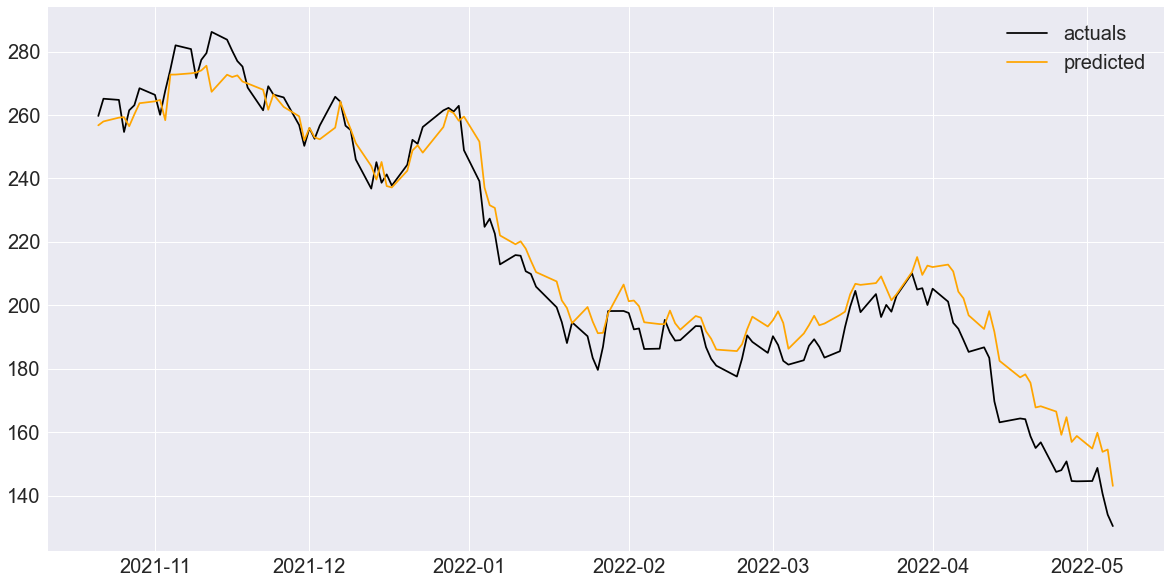

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['iipr_next_close'], color='black')
ax.plot(y_test6['iipr_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

version               model      rmse       mae  rows  train_rows  \
0         1+Dow  LinearRegression()  5.108586  4.175727  1367        1230   
1        1+ETFs  LinearRegression()  5.527867  4.461294  1367        1230   
2    1+ETFs+Dow  LinearRegression()  5.557261  4.418110  1367        1230   
4       All+Dow  LinearRegression()  6.697707  5.562722  1367        1230   
3    All stocks  LinearRegression()  6.930271  5.804915  1367        1230   
6  All+ETFs+Dow  LinearRegression()  8.545954  7.102156  1367        1230   
5      All+ETFs  LinearRegression()  8.866173  7.372258  1367        1230   

   test_rows  columns  
0        137       56  
1        137      160  
2        137      186  
4        137      290  
3        137      264  
6        137      420  
5        137      394

In [220]:
# hyper_table.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table.csv', index=False)